In [17]:
import pandas as pd
import plotly.graph_objects as go
import json

# Charger les données de prédiction pour comparer
df_results = pd.read_csv(r'df_results.csv', index_col=0, parse_dates=['datehour'])
with open(r'history.json', 'r') as f:
    history = json.load(f)
    
## on marque les heures de pointe
Q1, Q2 = df_results.delta.quantile([0.25, 0.75]).values
IQR = Q2 - Q1
TOP_FENCE = Q2 + 1.5 * IQR
BOTTOM_FENCE = Q1 - 1.5 * IQR
df_results['rush'] = ((df_results.delta > TOP_FENCE) | (df_results.delta < BOTTOM_FENCE)).astype(int)

In [18]:
pred_cols = df_results.columns[df_results.columns.str.startswith('pred__')].to_list()
pred_cols

['pred__full_LinearRegression_base',
 'pred__full_BayesianRidge_base',
 'pred__full_XGBRegressor_max_base',
 'pred__full_XGBRegressor_med_base',
 'pred__full_XGBRegressor_default_base',
 'pred__full_LinearRegression_w',
 'pred__full_BayesianRidge_w',
 'pred__full_XGBRegressor_max_w',
 'pred__full_XGBRegressor_med_w',
 'pred__full_XGBRegressor_default_w',
 'pred__full_LinearRegression_ow',
 'pred__full_BayesianRidge_ow',
 'pred__full_XGBRegressor_max_ow',
 'pred__full_XGBRegressor_med_ow',
 'pred__full_XGBRegressor_default_ow',
 'pred__full_LinearRegression_uw',
 'pred__full_BayesianRidge_uw',
 'pred__full_XGBRegressor_max_uw',
 'pred__full_XGBRegressor_med_uw',
 'pred__full_XGBRegressor_default_uw',
 'pred__LinearRegression_base',
 'pred__BayesianRidge_base',
 'pred__XGBRegressor_max_base',
 'pred__XGBRegressor_med_base',
 'pred__XGBRegressor_default_base',
 'pred__LinearRegression_w',
 'pred__BayesianRidge_w',
 'pred__XGBRegressor_max_w',
 'pred__XGBRegressor_med_w',
 'pred__XGBRegres

In [ ]:
# Créer la table de données quantiliènnes
df_dist = df_results[['delta'] + pred_cols].quantile([0, 0.25, 0.5, 0.75, 1]).T\
    .rename(columns={0 : 'Qmin', 0.25 : 'Q1', 0.5 : 'Q2', 0.75 : 'Q3', 1 : 'Qmax'})
df_dist['IQR'] = df_dist['Q3'] - df_dist['Q1']
df_dist['top'] = df_dist['Q3'] + 1.5 * df_dist['IQR']
df_dist['top'] = df_dist[['top', 'Qmax']].max(axis=1)
df_dist['bottom'] = df_dist['Q1'] - 1.5 * df_dist['IQR']
df_dist['bottom'] = df_dist[['bottom', 'Qmin']].min(axis=1)

df_dist


In [ ]:
df_results['rush'].rename('t')

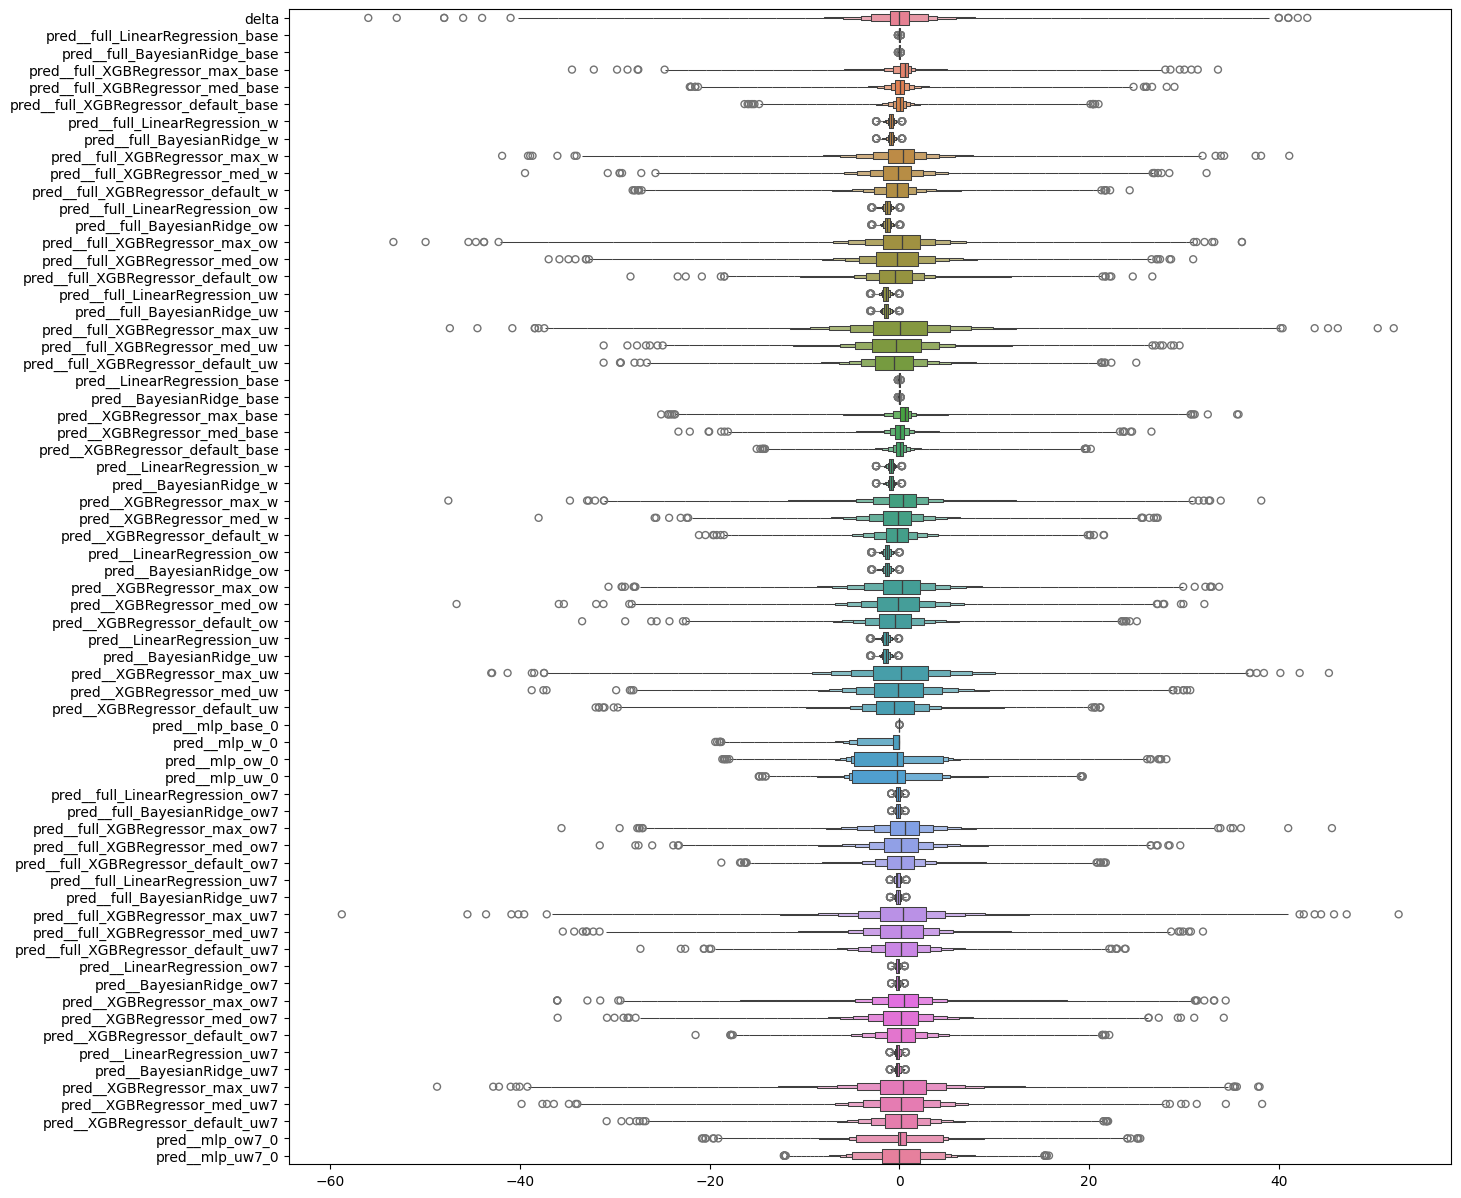

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
sns.boxenplot(df_results[['delta'] + pred_cols], orient='h')
plt.show()


In [ ]:
import bokeh.plotting as bp
from bokeh.io import output_notebook
output_notebook()
keys = df_dist.index.str.replace('pred__', '').to_list()
fig = bp.figure(tools=['save'], y_range=keys, title='Distrubution des valeurs réelles et prédites',
                width = 1000, height=1000, x_axis_type='linear')
# stems
fig.segment(df_dist['bottom'], keys, df_dist['Q1'], keys, line_color="black")
fig.segment(df_dist['top'], keys, df_dist['Q3'], keys, line_color="black")

fig.hbar(keys, 0.7, df_dist['Q2'], df_dist['Q1'], line_color='black')
fig.hbar(keys, 0.7, df_dist['Q3'], df_dist['Q2'], line_color='black')
fig.rect(x=df_dist['bottom'], y=keys, height=0.5, width=(df_dist['Qmax'] - df_dist['Qmin'])/500,  line_color="black")
fig.rect(x=df_dist['top'], y=keys, height=0.5, width=(df_dist['Qmax'] - df_dist['Qmin'])/500,  line_color="black")

bp.show(fig)

In [ ]:
df_results.columns

In [15]:
from velibds import VelibDataViz as viz
chatelet = '82328045'

df_results['pred__mlp_uw_0'] = df_results['pred__mlp_ow_0'].round().astype(int)
viz.line(df_results[df_results.station.astype(str) == chatelet], [{
    'x' : 'datehour',
    'y' : 'delta',
    'color' : 'black'
},
{
    'x' : 'datehour',
    'y' : 'pred__mlp_uw_0',
    'color' : 'red'
}], filename='test.html')

In [16]:
from velibds.modelisation import station_graph

station_graph(df_results, df_results['pred__mlp_uw_0'], chatelet, 'Chatelet par pred__mlp_uw_0', enable_4h=True)